# 1. Load Multimodal Data

## 1.1. Extract and Partition Text, Tables, and Images

In [1]:
# Remove all existing figures
!rm -rf ./figures

In [2]:
import os
from langchain_community.document_loaders import UnstructuredPDFLoader

# Directory containing the PDFs
pdf_dir = './references'

# Collect all PDF files from the directory and subdirectories, excluding hidden ones
pdf_files = []
for root, dirs, files in os.walk(pdf_dir):
    # Exclude hidden directories
    dirs[:] = [d for d in dirs if not d.startswith('.')]
    for file in files:
        # Exclude hidden files
        if file.lower().endswith('.pdf') and not file.startswith('.'):
            pdf_files.append(os.path.join(root, file))

# Initialize an empty list to hold data from all PDFs
data = []

# Loop through each PDF file and load it
for pdf_file in pdf_files:
    print(f'Loading {pdf_file}')
    loader = UnstructuredPDFLoader(
        file_path=pdf_file,
        strategy='hi_res',
        extract_images_in_pdf=True,
        infer_table_structure=True,
        chunking_strategy="by_title",     # section-based chunking
        max_characters=4000,              # max size of chunks
        new_after_n_chars=4000,           # preferred size of chunks
        combine_text_under_n_chars=2000,  # combine smaller chunks
        mode='elements',
        image_output_dir_path='./figures'
    )
    data.extend(loader.load())

Loading ./references/Sample 2.pdf


/home/shihchi_liu/RAG/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading ./references/Sample 1.pdf


In [24]:
docs = []
tables = []

for doc in data:
    if doc.metadata['category'] == 'Table':
        tables.append(doc)
    elif doc.metadata['category'] == 'CompositeElement':
        docs.append(doc)

len(docs), len(tables)

(10, 5)

In [25]:
import htmltabletomd

for table in tables:
    table.page_content = htmltabletomd.convert_table(table.metadata['text_as_html'])

## 1.2. Examine Loaded Data (Optional)

In [27]:
from IPython.display import HTML, display, Markdown, Image

In [15]:
docs[0]

Document(metadata={'source': './references/Sample 2.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2024-11-17T16:34:32', 'page_number': 1, 'orig_elements': 'eJy9WUtv40YS/isNnTyAmun3Y3LKYbAJsJk1YmP3MBkY/aJEDEVyScqOEeS/p7opTYyMDrYQ6WKril1ks7+qrx789PsqtWmXuvmhiav3aEWNU14Lj603HgsWIjbME2ycjoZHJZ0MqzVa7dLsopsd2Py+Cn0/xqZzc5qK3Lrnfj8/bFOz2c6gYYwQsDmon5o4b0FLddEOfdPN2e7TJ8N5ZdaIElaJz2v0VWZ6kakktpKnFMUCNKvpeZrTLr/JbfNbau8GF9LqD7gQ05zC3PTdQ2jdND0MY+9hGaksMdzCgrpp0/w8pGJ7+/OqbLjb7N2mvNWnVeo2q89FO80Puz42dZPKmTHCBKYUU31P1Xsu3nOWrQewfOj2O5/G/LZ5E3P6LZ/H6kOXxn/tm5jQL25uug26K9v+dc8IFfcpbLsmuBbdjn1IcT+mabny3zRO8AaIyoqWRxz3+2NyEZ4Cj/g7nkwKFpUJsDkRsaAqYCclx4Rba2rqLdPkYngybgt+mlc8w3WQGRGLTLk1lTqhWCzOw9MYJuWV8cwnh0LftsuW0A6Obmxc+136/74ZMhzoJlWbCs3Ow67WKLTN4Hs3xjXajG7YosENaVyjIXWhaZHrIkqjm9L47vuXOP+7meaf8nmcQNrJJIS2FnOpaiwiwO15zbBKyXMTE1VCXw5poSsKQFJe6YL0QRZikQU1lTghl/Xn4awt5frKOId+N8AmXo0Jo1bWOtTYMcex0Mlio5XDgQPn2AQUS+sLYsIqOCBggEP0LTJncsGACqMrfkKxWJzJpvAUeu3oazbNDHQZ3A6CBt3sm

In [11]:
print(tables[0].page_content)

Component Requirement Processor Intel Core i5 or equivalent CPU Operating system Windows 7 SP 1, Windows 10 (32/64-bit) Memory 4 GB RAM (32-bit) Hard disk space 8 GB available disk space Display Graphics card must support at least 1024x768 resolution


In [12]:
tables[0].metadata['text_as_html']

'<table><tr><td>Component</td><td>Requirement</td></tr><tr><td>Processor</td><td>Intel Core i5 or equivalent CPU</td></tr><tr><td>Operating system</td><td>Windows 7 SP 1, Windows 10 (32/64-bit)</td></tr><tr><td>Memory</td><td>4 GB RAM (32-bit)</td></tr><tr><td>Hard disk space</td><td>8 GB available disk space</td></tr><tr><td>Display</td><td>Graphics card must support at least 1024x768 resolution</td></tr></table>'

In [13]:
display(Markdown(tables[0].metadata['text_as_html']))

<table><tr><td>Component</td><td>Requirement</td></tr><tr><td>Processor</td><td>Intel Core i5 or equivalent CPU</td></tr><tr><td>Operating system</td><td>Windows 7 SP 1, Windows 10 (32/64-bit)</td></tr><tr><td>Memory</td><td>4 GB RAM (32-bit)</td></tr><tr><td>Hard disk space</td><td>8 GB available disk space</td></tr><tr><td>Display</td><td>Graphics card must support at least 1024x768 resolution</td></tr></table>

In [21]:
for table in tables:
    print(table.page_content)
    print()

| | |
| :--- | :--- |
| Component | Requirement |
| Processor | Intel Core i5 or equivalent CPU |
| Operating system | Windows 7 SP 1, Windows 10 (32/64-bit) |
| Memory | 4 GB RAM (32-bit) |
| Hard disk space | 8 GB available disk space |
| Display | Graphics card must support at least 1024x768 resolution |


| | | | | | | |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Component | &lt;9.5 mm (&lt;3/8 in.) | 9.5-13mm (3/8 - 1/2 in.) | &#124; &gt;13-20mm &#124; &#124; (&gt;1/2-3/4in.) | &gt;20-40mm &#124; (&gt;3/4-1.5in.) &#124; | &gt;40 - 90 mm (&gt;1.5-3.5in.) &#124; | &gt;90 mm (&gt;3.5 in.) |
| Walls | 0 | 0.15 | 0.16 | 0.18 | 0.18 | 0 |
| Floors | 0 | 0.15 | 0.16 | 0.18 | 0.20 | 0 |
| Ceilings | 0 | 0.15 | 0.15 | 0.15 | 0.16 | 0 |
| Open joint cladding | 0 | 0 | 0 | 0 | 0 | 0 |


| | |
| :--- | :--- |
| Load | Thresholds and Resulting Values |
| Lighting | &lt; 25% of fixtures | with CFLs or LEDs | = 2.6 kWhiday (standard value) |
| &#124; 25%-75% of fixtures | with CFLs or 

In [26]:
! ls -l ./figures

total 452
-rw-r--r-- 1 shihchi_liu shihchi_liu  27929 Nov 17 17:07 figure-1-1.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu  27182 Nov 17 17:07 figure-1-2.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu  26589 Nov 17 17:07 figure-1-3.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu  26448 Nov 17 17:07 figure-2-4.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu  29260 Nov 17 17:07 figure-2-5.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu 102442 Nov 17 17:06 figure-3-1.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu 101680 Nov 17 17:06 figure-4-2.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu  40062 Nov 17 17:06 figure-4-3.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu  50949 Nov 17 17:06 figure-5-4.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu   9820 Nov 17 17:06 figure-5-5.jpg


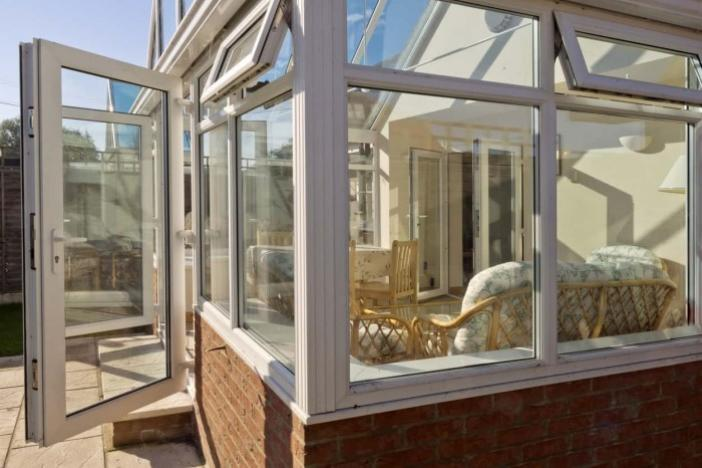

In [29]:
Image('./figures/figure-5-4.jpg')

# 2. Connect to LLM through API

In [30]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key:  ········


In [31]:
os.environ['OPENAI_API_KEY'] = OPENAI_KEY

In [32]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name='gpt-4o', temperature=0)

# 3. Construct Multi-Vector Retriever

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnablePassthrough

# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text particularly for semantic retrieval.
These summaries will be embedded and used to retrieve the raw text or table elements
Give a detailed summary of the table or text below that is well optimized for retrieval.
For any tables also add in a one line description of what the table is about besides the summary.
Do not add additional words like Summary: etc.

Table or text chunk:
{element}
"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
summarize_chain = (
                    {"element": RunnablePassthrough()}
                      |
                    prompt
                      |
                    chatgpt
                      |
                    StrOutputParser() # extracts the response as text and returns it as a string
)

# Initialize empty summaries
text_summaries = []
table_summaries = []

text_docs = [doc.page_content for doc in docs]
table_docs = [table.page_content for table in tables]

text_summaries = summarize_chain.batch(text_docs, {"max_concurrency": 5})
table_summaries = summarize_chain.batch(table_docs, {"max_concurrency": 5})

len(text_summaries), len(table_summaries)

In [ ]:
text_summaries[0]

In [ ]:
table_summaries[0]

In [ ]:
import base64
import os

from langchain_core.messages import HumanMessage


def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


def image_summarize(img_base64, prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4o", temperature=0)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content


def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval.
                Remember these images could potentially contain graphs, charts or tables also.
                These summaries will be embedded and used to retrieve the raw image for question answering.
                Give a detailed summary of the image that is well optimized for retrieval.
                Do not add additional words like Summary: etc.
             """

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))

    return img_base64_list, image_summaries


# Image summaries
IMG_PATH = './figures'
imgs_base64, image_summaries = generate_img_summaries(IMG_PATH)

In [ ]:
len(imgs_base64), len(image_summaries)

In [ ]:
display(Image('./figures/figure-1-2.jpg'))

In [ ]:
image_summaries[1]

In [ ]:
from langchain_openai import OpenAIEmbeddings

# details here: https://openai.com/blog/new-embedding-models-and-api-updates
openai_embed_model = OpenAIEmbeddings(model='text-embedding-3-small')

In [ ]:
docs[0]

In [ ]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_community.storage import RedisStore
from langchain_community.utilities.redis import get_client
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings


def create_multi_vector_retriever(
    docstore, vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images
):
    """
    Create retriever that indexes summaries, but returns raw images or texts
    """


    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=docstore,
        id_key=id_key,
    )

    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]
        summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]
        retriever.vectorstore.add_documents(summary_docs)
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    # Add texts, tables, and images
    # Check that text_summaries is not empty before adding
    if text_summaries:
        add_documents(retriever, text_summaries, texts)
    # Check that table_summaries is not empty before adding
    if table_summaries:
        add_documents(retriever, table_summaries, tables)
    # Check that image_summaries is not empty before adding
    if image_summaries:
        add_documents(retriever, image_summaries, images)

    return retriever


# The vectorstore to use to index the summaries and their embeddings
chroma_db = Chroma(
    collection_name="mm_rag",
    embedding_function=openai_embed_model,
    collection_metadata={"hnsw:space": "cosine"},
)

# Initialize the storage layer - to store raw images, text and tables
client = get_client('redis://localhost:6379')
redis_store = RedisStore(client=client) # you can use filestore, memorystory, any other DB store also

# Create retriever
retriever_multi_vector = create_multi_vector_retriever(
    redis_store,
    chroma_db,
    text_summaries,
    text_docs,
    table_summaries,
    table_docs,
    image_summaries,
    imgs_base64,
)

In [ ]:
retriever_multi_vector

In [ ]:
from IPython.display import HTML, display, Image
from PIL import Image
import base64
from io import BytesIO

def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Decode the base64 string
    img_data = base64.b64decode(img_base64)
    # Create a BytesIO object
    img_buffer = BytesIO(img_data)
    # Open the image using PIL
    img = Image.open(img_buffer)
    display(img)

In [ ]:
# Check retrieval
query = "Tell me about the annual wildfires trend with acres burned"
docs = retriever_multi_vector.invoke(query, limit=5)

# We get 4 docs
len(docs)

In [ ]:
docs

In [ ]:
plt_img_base64(docs[3])

In [ ]:
# Check retrieval
query = "Tell me about the percentage of residences burned by wildfires in 2022"
docs = retriever_multi_vector.invoke(query, limit=5)

# We get 4 docs
len(docs)

In [ ]:
docs

In [ ]:
import re
import base64

def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xff\xd8\xff": "jpg",
        b"\x89\x50\x4e\x47\x0d\x0a\x1a\x0a": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False


def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []
    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content.decode('utf-8')
        else:
            doc = doc.decode('utf-8')
        if looks_like_base64(doc) and is_image_data(doc):
            b64_images.append(doc)
        else:
            texts.append(doc)
    return {"images": b64_images, "texts": texts}

In [ ]:
# Check retrieval
query = "Tell me detailed statistics of the top 5 years with largest wildfire acres burned"
docs = retriever_multi_vector.invoke(query, limit=5)

# We get 4 docs
len(docs)

In [ ]:
docs

In [ ]:
is_image_data(docs[1].decode('utf-8'))

In [ ]:
r = split_image_text_types(docs)
r

In [ ]:
plt_img_base64(docs[1].decode('utf-8'))

In [ ]:
from operator import itemgetter
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_core.messages import HumanMessage

def multimodal_prompt_function(data_dict):
    """
    Create a multimodal prompt with both text and image context.

    This function formats the provided context from `data_dict`, which contains
    text, tables, and base64-encoded images. It joins the text (with table) portions
    and prepares the image(s) in a base64-encoded format to be included in a message.

    The formatted text and images (context) along with the user question are used to
    construct a prompt for GPT-4o
    """
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text for analysis
    text_message = {
        "type": "text",
        "text": (
            f"""You are an analyst tasked with understanding detailed information and trends from text documents,
                data tables, and charts and graphs in images.
                You will be given context information below which will be a mix of text, tables, and images usually of charts or graphs.
                Use this information to provide answers related to the user question.
                Do not make up answers, use the provided context documents below and answer the question to the best of your ability.

                User question:
                {data_dict['question']}

                Context documents:
                {formatted_texts}

                Answer:
            """
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]


# Create RAG chain
multimodal_rag = (
        {
            "context": itemgetter('context'),
            "question": itemgetter('input'),
        }
            |
        RunnableLambda(multimodal_prompt_function)
            |
        chatgpt
            |
        StrOutputParser()
)

# Pass input query to retriever and get context document elements
retrieve_docs = (itemgetter('input')
                    |
                retriever_multi_vector
                    |
                RunnableLambda(split_image_text_types))

# Below, we chain `.assign` calls. This takes a dict and successively
# adds keys-- "context" and "answer"-- where the value for each key
# is determined by a Runnable (function or chain executing at runtime).
# This helps in also having the retrieved context along with the answer generated by GPT-4o
multimodal_rag_w_sources = (RunnablePassthrough.assign(context=retrieve_docs)
                                               .assign(answer=multimodal_rag)
)

In [ ]:
# Run RAG chain
query = "Tell me detailed statistics of the top 5 years with largest wildfire acres burned"
response = multimodal_rag_w_sources.invoke({'input': query})
response

In [ ]:
def multimodal_rag_qa(query):
    response = multimodal_rag_w_sources.invoke({'input': query})
    print('=='*50)
    print('Answer:')
    display(Markdown(response['answer']))
    print('--'*50)
    print('Sources:')
    text_sources = response['context']['texts']
    img_sources = response['context']['images']
    for text in text_sources:
        display(Markdown(text))
        print()
    for img in img_sources:
        plt_img_base64(img)
        print()
    print('=='*50)

In [ ]:
query = "Tell me detailed statistics of the top 5 years with largest wildfire acres burned"
multimodal_rag_qa(query)

In [ ]:
# Run RAG chain
query = "Tell me about the annual wildfires trend with acres burned"
multimodal_rag_qa(query)

In [ ]:
# Run RAG chain
query = "Tell me about the number of acres burned by wildfires for the forest service in 2021"
multimodal_rag_qa(query)

In [ ]:
# Run RAG chain
query = "Tell me about the percentage of residences burned by wildfires in 2022"
multimodal_rag_qa(query)